In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report

sns.set(style="whitegrid")

# DATA COLLECTION

In [38]:
data = {
    "Jam_Belajar": [2, 5, 9, 11, 8, 10, 12, 3, 7, 10, 11, 1, 6, 9, 12,4, 5],
    "Kehadiran":  [70, 75, 90, 95, 85, 88, 100, 72, 80, 92, 94, 70, 78, 89, 98,70, 75],
    "IPK":        [2.5, 2.8, 3.0, 3.4, 3.2, 3.3, 3.7, 2.6, 3.1, 3.6, 3.4, 2.2, 2.9, 3.5, 3.8, 2.7, 2.666],
    "Lulus_Tepat_Waktu": [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]
}

df = pd.DataFrame(data)
df

,Jam_Belajar,Kehadiran,IPK,Lulus_Tepat_Waktu
0,2,70,2.500,0
1,5,75,2.800,0
2,9,90,3.000,1
3,11,95,3.400,1
4,8,85,3.200,1
5,10,88,3.300,1
6,12,100,3.700,1
7,3,72,2.600,0
8,7,80,3.100,0
9,10,92,3.600,1


In [39]:
from sdv.single_table import ctgan

model = ctgan.CTGAN(epochs=1000)

# Fit ke data
model.fit(df)

# Generate data sintetis
synthetic_data = model.sample(400)

In [40]:
synthetic_data.describe(include="all").round(2)


,Jam_Belajar,Kehadiran,IPK,Lulus_Tepat_Waktu
count,400.00,400.00,400.00,400.00
mean,7.36,83.74,3.14,0.57
std,3.66,10.85,0.47,0.50
min,-2.00,55.00,1.94,0.00
25%,5.00,76.00,2.79,0.00
50%,8.00,84.00,3.12,1.00
75%,10.00,92.00,3.46,1.00
max,16.00,109.00,4.25,1.00


# EDA

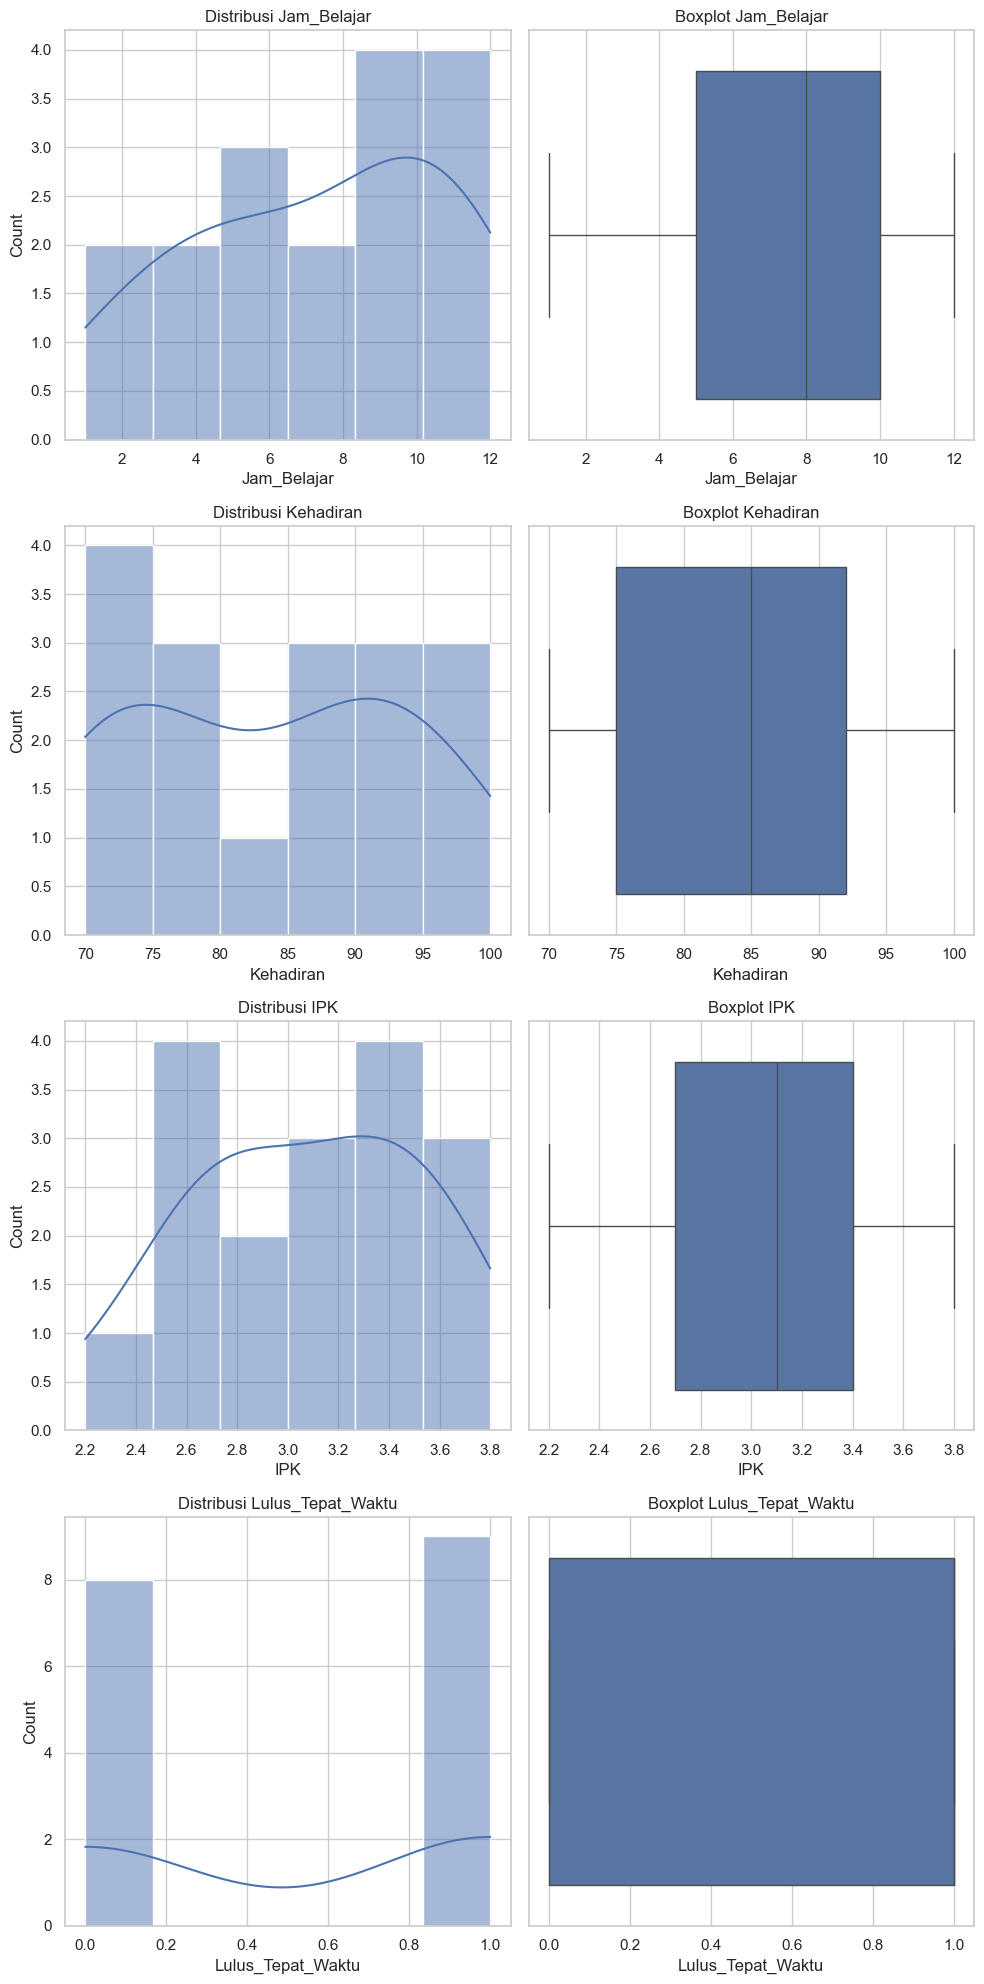

In [41]:
numeric_features = df.select_dtypes(include="number").columns

plt.figure(figsize=(10, 5 * len(numeric_features)))  

for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features), 2, 2*i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribusi {col}")
    
    plt.subplot(len(numeric_features), 2, 2*i+2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")

plt.tight_layout()
plt.show()


In [42]:
df["Lulus_Tepat_Waktu"].value_counts(normalize=True)

Lulus_Tepat_Waktu
1    0.529412
0    0.470588
Name: proportion, dtype: float64

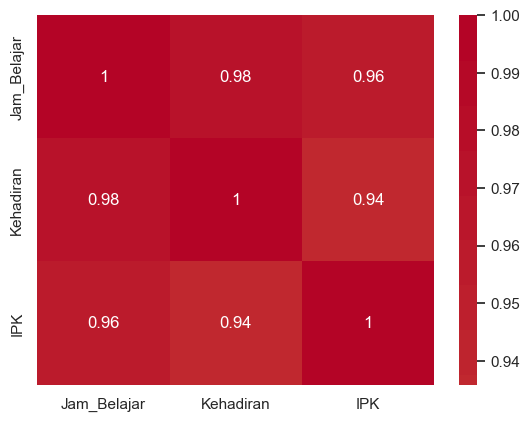

In [43]:

corr = df[["Jam_Belajar", "Kehadiran", "IPK"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()

# SPLITING DATA

In [56]:
X = df[["Jam_Belajar", "Kehadiran", "IPK"]]
y = df["Lulus_Tepat_Waktu"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(y_train.shape)

print(X.shape)
print(y.shape)



(13, 3)
(13,)
(17, 3)
(17,)


# MODEL BUILDING

In [57]:
model = RandomForestClassifier(
    n_estimators=100,   
    max_depth=None,     
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# EVALUATION

In [58]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

